In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
from osc_toolkit import *
from models import *

In [2]:
params1 = {'alpha': 10, 'beta': 10, 'theta': 0.25, 'phi': 15}
consts1 = {'lam': 0.1, 'm': 2}
init_cond = [0.1, 0, 0]
model1 = oscillation(full_FTC_first_order, list(params1.values()), list(consts1.values()), init_cond)
sol1 = model1.simulate(t=5)

In [3]:
params2 = {'alpha': 3.55, 'beta': 3.25, 'theta': 0.2, 'phi': 5}
consts2 = {'lam': 0.2, 'm': 2}
init_cond = [0.1, 0, 0]
model2 = oscillation(full_FTC_first_order, list(params2.values()), list(consts2.values()), init_cond)
sol2 = model2.simulate(t=5)

In [51]:
class mixed_oscillation(oscillation):
    def __init__(self, model, params1, params2, consts1, consts2, init_cond):

        params1 = list(params1.values()) if isinstance(params1, dict) else params1
        params2 = list(params2.values()) if isinstance(params2, dict) else params2
        consts1 = list(consts1.values()) if isinstance(consts1, dict) else consts1
        consts2 = list(consts2.values()) if isinstance(consts2, dict) else consts2

        # Model and parameters
        self._model = model['model']
        self._params = np.concatenate((params1, params2))
        self._consts = np.concatenate((consts1, consts2))
        self._calc_all = model['calc_all']
        self._init_cond = init_cond

        # Essential information
        self._species = ['A2', 'S1', 'S2', 'A', 'O']
        self._info = model['info']

        # Experimental data
        self._exp_data = None

    def plot(self, t=10, exp=False, method='RK45', ylim=None, npoints=500):
        color = ['purple', 'b', 'lightskyblue', 'r', 'g']

        sol = self.simulate(t, method=method, npoints=npoints)
        c = self._calc_all(sol, self._consts, self._params)
        fig, ax = plt.subplots(2, 2, figsize=(7, 5))

        ax[0, 0].plot(sol.t, c[0], label=self._species[0], color=color[0])
        ax[0, 1].plot(sol.t, c[1], label=self._species[1], color=color[1])
        ax[0, 1].plot(sol.t, c[2], label=self._species[2], color=color[2])
        ax[1, 0].plot(sol.t, c[3], label=self._species[3], color=color[3])
        ax[1, 1].plot(sol.t, c[4], label=self._species[4], color=color[4])

        for a in ax.flatten():
            if ylim != None:
                ax.set_ylim(0, ylim)
            a.legend(loc="upper right")
            
        fig.supxlabel('Normalized Time')
        fig.supylabel('Normalized Concentration')
        plt.tight_layout()
        return fig, ax

In [52]:
def full_two_thiols_model(t, vars, params):
    alpha1, beta1, theta1, phi1, alpha2, beta2, theta2, phi2, lam1, m1, lam2, m2 = params
    cA2, cS1, cS2, cO = vars
    r = lam1/lam2
    cM1 = cS1**m1
    cM2 = cS2**m2
    cA = 2 * (1 - cA2) - lam1 * (cS1 + cM1) - lam2 * (cS2 + cM2)
    dcA2dt = cO * cA - (theta1 + theta2) * cA2 - alpha1 * (cM1 + r * cM2) * cA2 - alpha2 * (1/r * cM1 + cM2) * cA2
    dcS1dt = theta1/lam1 * cA2 - phi1 * cS1 + alpha1/lam1 * (cM1 + r * cM2) * cA2 - beta1 * cM1
    dcS2dt = theta2/lam2 * cA2 - phi2 * cS2 + alpha2/lam2 * (1/r * cM1 + cM2) * cA2 - beta2 * cM2
    dcOdt = 1 - cO * cA
    return [dcA2dt, dcS1dt, dcS2dt, dcOdt]

def calc_all_full_two_thiols(sol, consts, *params):
    cA2, cS1, cS2, cO = sol.y
    lam1, m1, lam2, m2 = consts
    cS1_sum = cS1 + cS1**m1
    cS2_sum = cS2 + cS2**m2
    cA = 2 * (1 - cA2) - lam1 * cS1_sum - lam2 * cS2_sum
    return [cA2, cS1_sum, cS2_sum, cA, cO]

full_two_thiols = {'model': full_two_thiols_model, 'calc_all': calc_all_full_two_thiols, 'info': '4*2 parameters, 2*2 constants, 4 species: A2, S1, S2, O'}

In [53]:
params1 = {'alpha': 12, 'beta': 12, 'theta': 0.25, 'phi': 15}
params2 = {'alpha': 3.55, 'beta': 3.25, 'theta': 0.2, 'phi': 5}
consts1 = {'lam': 0.1, 'm': 2}
consts2 = {'lam': 0.2, 'm': 2}
init_cond = [0.1, 0, 0, 0]

mixed_model = mixed_oscillation(full_two_thiols, params1, params2, consts1, consts2, init_cond)

(<Figure size 700x500 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

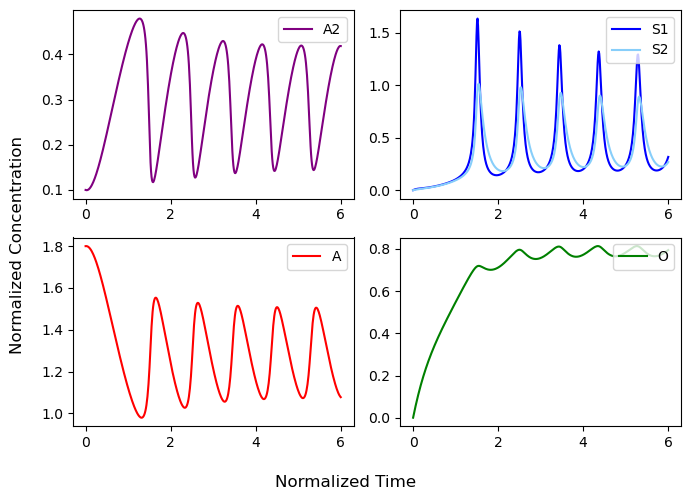

In [54]:
mixed_model.plot(t=6)